In [1]:
# W2_H1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')
Tit_n = pd.read_csv('titanic_train.csv')
Tit_n.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#결측값 제거_____이거 하면 PPT에 있는 것과 다른그림나옴.
print(Tit_n.isnull().sum())
Tit_n['Age'].fillna(Tit_n['Age'].mean(), inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [3]:
#결측값 제거
print(Tit_n.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
# W2_H1
def AG(x):
    if x <10:
        return '유아'
    if 10<=x<20:
        return'10대'
    if 20<=x<30:
        return'20대'
    if 30<=x<40:
        return'30대'
    if 40<=x<50:
        return'40대'
    if 50<=x<60:
        return'50대'
    if 60<=x<70:
        return '60대'
    else: 
        return '노인'

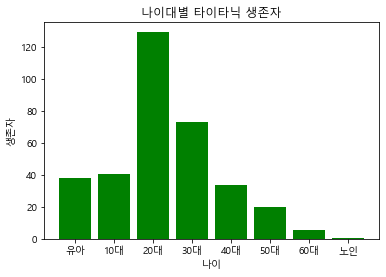

In [5]:
# W2_H1-1
Tit_n['Age_G'] = Tit_n['Age'].apply(AG)

gs = Tit_n.groupby('Age_G')['Survived'].sum()
gs = gs.reindex(['유아','10대','20대','30대','40대','50대','60대','노인'])
plt.bar(gs.index, [gs[i] for i in range(len(gs.index))], color = 'g')
plt.title('나이대별 타이타닉 생존자')
plt.xlabel('나이')
plt.ylabel('생존자')
plt.show()

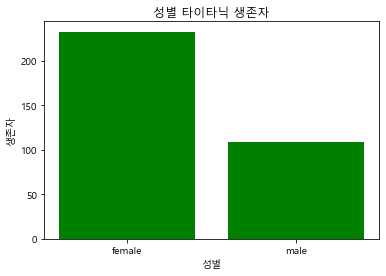

In [6]:
# W2_H1-2
ss = Tit_n.groupby('Sex')['Survived'].sum()
plt.bar(ss.index ,[ss[i] for i in range(2)], color = 'g')
plt.title('성별 타이타닉 생존자')
plt.xlabel('성별')
plt.ylabel('생존자')
plt.show()

In [7]:
# W2_H2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cd = pd.read_csv('kr_daily.csv')
cd
ndr= pd.date_range(start='2020/01/21',end='2020/06/01')

In [8]:
#1번
cd_c = cd.groupby('date')['confirmed'].sum()

cd_c.index = ndr

D1 = cd_c['2020/05/18':'2020/06/01']
ndr

DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30',
               ...
               '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26',
               '2020-05-27', '2020-05-28', '2020-05-29', '2020-05-30',
               '2020-05-31', '2020-06-01'],
              dtype='datetime64[ns]', length=133, freq='D')

In [9]:
x1 = D1.index
y1 = D1

In [10]:
#2번
cd_d = cd.groupby('date')['death'].sum()
cd_d.index = ndr
D2 = cd_d['2020/05/18':'2020/06/01']
D2

2020-05-18    263
2020-05-19    263
2020-05-20    263
2020-05-21    264
2020-05-22    264
2020-05-23    266
2020-05-24    266
2020-05-25    267
2020-05-26    269
2020-05-27    269
2020-05-28    269
2020-05-29    269
2020-05-30    269
2020-05-31    270
2020-06-01    271
Freq: D, Name: death, dtype: int64

<BarContainer object of 15 artists>

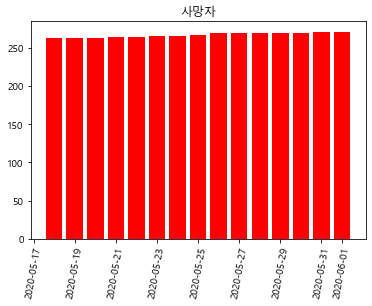

In [11]:
x2 = D2.index
y2 = D2

plt.title('사망자')
plt.xticks( rotation=80 )
plt.bar(x2,y2, color ='r')

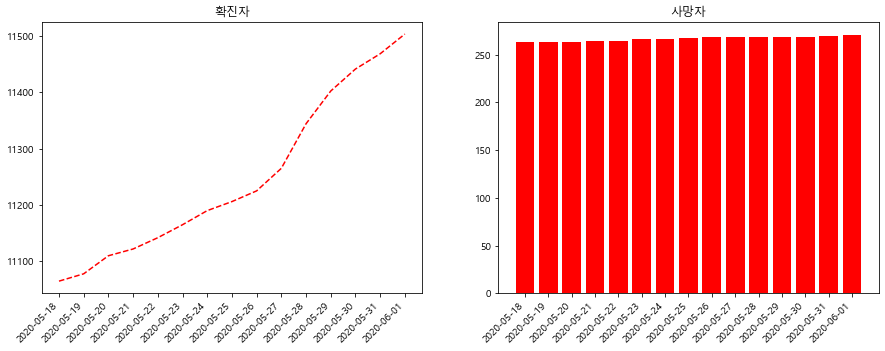

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('확진자')
plt.plot(x1,y1,'r--')
plt.xticks(x1[:], rotation=45, ha = 'right' )

plt.subplot(1,2,2)
plt.title('사망자')
plt.bar(x2,y2, color ='r')
plt.xticks(x2[:], rotation=45, ha = 'right' )


plt.show()